<a href="https://colab.research.google.com/github/RizalAzmi99/Project_Neural_Networks_SI/blob/main/Dataset_hotel_booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Hotel Booking**

Data reservasi hotel.
Prediksi pembatalan reservasi.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from google.colab import drive

Diatas ini berguna untuk Mengimport library yang dibutuhkan

In [8]:
driv.mount('/content/drive')e
file_path = '/content/drive/MyDrive/Tugas/Machine Learning/Kelompok Dataset 4/hotel_bookings.csv'
df = pd.read_csv(file_path)

print("Info Dataset:")
print(df.info())
print("\nStatistik Target (is_canceled):")
print(df['is_canceled'].value_counts(normalize=True))

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  me

Pada Kode diatas berfungsi untuk mounting drive ke google colab. kemudian google colab akan membaca dataset yang berada di google drive


In [9]:
print("\n--- 2. Data Preparation ---")

cols_to_drop = ['reservation_status', 'reservation_status_date', 'company', 'agent', 'country']
df = df.drop(cols_to_drop, axis=1)

df['children'] = df['children'].fillna(0)

X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

categorical_cols = [c for c in X.columns if X[c].dtype == 'object']
numerical_cols = [c for c in X.columns if X[c].dtype in ['int64', 'float64']]

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

try:
    X_train_processed = X_train_processed.toarray()
    X_test_processed = X_test_processed.toarray()
except AttributeError:
    pass

print(f"Dimensi Data Training setelah preprocessing: {X_train_processed.shape}")


--- 2. Data Preparation ---
Dimensi Data Training setelah preprocessing: (83573, 77)


Data Preparation

Pada cell ini memproses data mentah menjadi format yang siap digunakan oleh algoritma Machine Learning:

Feature Selection: Menghapus kolom yang berpotensi menyebabkan data leakage (seperti reservation_status) atau kolom dengan null tinggi/tidak relevan (seperti company, agent).

Handling Missing Values: Mengisi nilai kosong pada kolom children dengan 0.

Preprocessing Pipeline: Membangun pipeline otomatis menggunakan ColumnTransformer:

Numerik: Mengisi nilai kosong dengan 0 dan menstandarisasi skala data (StandardScaler).

Kategorikal: Mengisi nilai kosong dengan 'Unknown' dan mengubah data menjadi vektor biner (OneHotEncoder).

Data Splitting: Membagi dataset menjadi 70% training dan 30% testing.

Transformation: Menerapkan transformasi pada data dan mengonversi format sparse matrix menjadi dense array agar kompatibel dengan model.

In [10]:
print("\n--- 3. Desain Neural Networks ---")

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_processed.shape[1],)),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


--- 3. Desain Neural Networks ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         4,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,105 (27.75 KB)

 Trainable params: 7,105 (27.75 KB)

 Non-trainable params: 0 (0.00 B)

Desain Neural Networks

Pada tahap ini, dibangun arsitektur Artificial Neural Network (ANN) menggunakan model Sequential dengan spesifikasi berikut:

Input & Hidden Layer 1: Menggunakan Dense layer dengan 64 neuron dan fungsi aktivasi ReLU untuk menangkap pola non-linear dari data fitur.

Regularization (Dropout): Menerapkan Dropout sebesar 0.3 (30%) setelah layer pertama dan 0.2 (20%) setelah layer kedua untuk mencegah overfitting saat proses training.

Hidden Layer 2: Layer tambahan dengan 32 neuron untuk memperdalam kemampuan belajar model.

Output Layer: Menggunakan 1 neuron dengan aktivasi Sigmoid. Ini wajib digunakan untuk klasifikasi biner karena menghasilkan output probabilitas antara 0 hingga 1.

Model Compilation:

Optimizer: Adam (algoritma optimasi adaptif yang efisien).

Loss Function: binary_crossentropy (standar untuk kasus klasifikasi dua kelas).

Metric: accuracy untuk memantau performa model.


--- 4. Training & Evaluasi ---
Epoch 1/15
2090/2090 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7597 - loss: 0.4902 - val_accuracy: 0.8154 - val_loss: 0.4024
Epoch 2/15
2090/2090 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8114 - loss: 0.4059 - val_accuracy: 0.8216 - val_loss: 0.3869
Epoch 3/15
2090/2090 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8191 - loss: 0.3895 - val_accuracy: 0.8260 - val_loss: 0.3776
Epoch 4/15
2090/2090 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8193 - loss: 0.3867 - val_accuracy: 0.8278 - val_loss: 0.3753
Epoch 5/15
2090/2090 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8248 - loss: 0.3800 - val_accuracy: 0.8312 - val_loss: 0.3697
Epoch 6/15
2090/2090 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8297 - loss: 0.3700 - val_accuracy: 0.8337 - val_loss: 0.3670
Epoch 7/15
2090/2090 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8305 - loss: 0.3670 - val_accuracy: 0.8330 - val_loss: 0.3649
Epoch 8/15
2090/2090 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - 

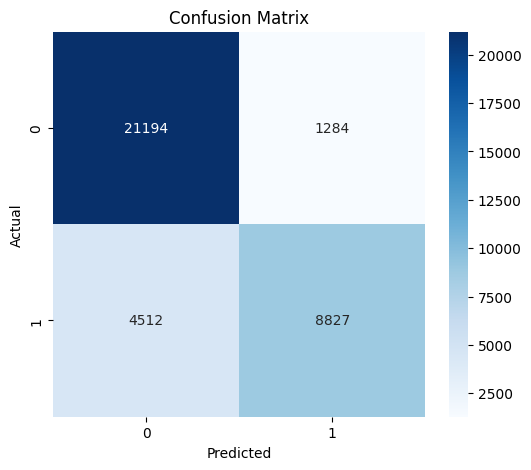

In [11]:
print("\n--- 4. Training & Evaluasi ---")

history = model.fit(X_train_processed, y_train,
                    epochs=15,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

loss, accuracy = model.evaluate(X_test_processed, y_test, verbose=0)
y_pred_prob = model.predict(X_test_processed)
y_pred = (y_pred_prob > 0.5).astype(int)

print(f"\nAkurasi pada Data Test: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Training & Evaluasi

Tahap ini adalah eksekusi pembelajaran model dan penilaian performa akhirnya:

Training Process: Model dilatih selama 15 epochs dengan ukuran batch 32. Sebanyak 20% dari data training disisihkan sebagai data validasi (validation split) untuk memantau performa model secara real-time dan mendeteksi overfitting.

Prediction & Thresholding: Model memprediksi probabilitas pada data test. Karena output berupa nilai kontinu (0-1), diterapkan threshold 0.5 untuk mengonversi probabilitas menjadi kelas biner (0 atau 1).

Performance Metrics:

Akurasi: Mengukur persentase total prediksi yang benar.

Classification Report: Menampilkan detail Precision, Recall, dan F1-Score untuk melihat seberapa baik model mengenali kelas minoritas (misal: pembatalan).

Visualization: Membuat Confusion Matrix dalam bentuk heatmap untuk memvisualisasikan jumlah prediksi benar (True Positive/Negative) vs prediksi salah (False Positive/Negative).